In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Define variables for known experimental parameters

stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)

spikes = pd.read_csv('data/ten_intensities.csv')

#Figure out the structure of the data

spikes.head()

spikes.sample(25)

spikes.shape

# Need to order the data by trial.
# Since the order of trials is not sequential the data needs to be put in order so 
# that when the data is plotted it is in order of trial
# The line of code below will accomplish this need. 
trials = sorted(spikes['Trial'].unique())



In [13]:
# Visualizing the Data ############

# Raster plot

dat = spikes[spikes['Intensity'] == 9]

fig, ax = plt.subplots()

# Shade time when stimulus was on
ax.axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')

# Draw the raster one trial at a time using a for loop
for trial in trials:
    # get spike times for this trial
    spike_times = dat[dat['Trial'] == trial]['SpikeTime']
    # Draw the raster
    ax.vlines(spike_times, trial - 0.4, trial + 0.4)

plt.show()


In [14]:
# Visualizing the Data ##############

# Peri-Stimulus Time Histogram (PSTH)

fig, ax = plt.subplots()

ax.axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')
ax.hist(dat['SpikeTime'],bins=range(0, num_tp, 1))

plt.show()

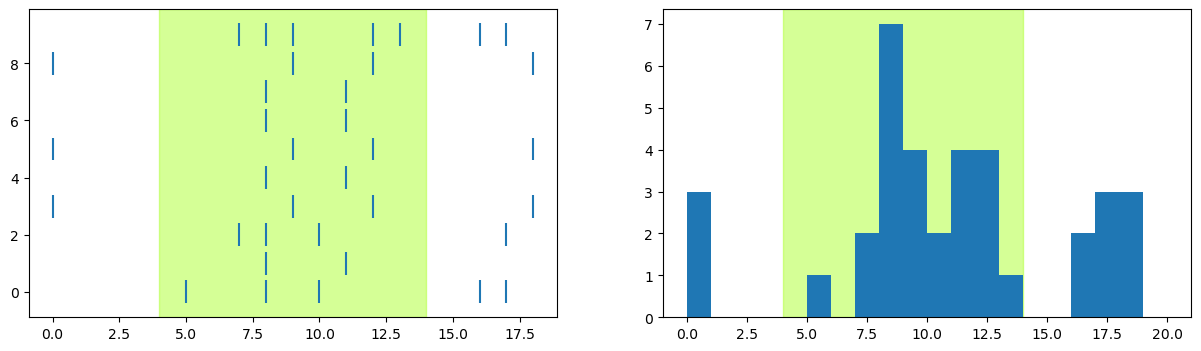

In [17]:
# Visualizing the Data ##############

#Combine raster and PSTH

fig, axs = plt.subplots(1, 2, figsize=[15, 4])

axs[0].axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')

dat = spikes[spikes['Intensity'] == 9]

for trial in trials:
    spike_times = dat[dat['Trial'] == trial]['SpikeTime']
    axs[0].vlines(spike_times, trial - 0.4, trial + 0.4)
    

axs[1].axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')
axs[1].hist(dat['SpikeTime'],bins=range(0, num_tp, 1))

plt.show()




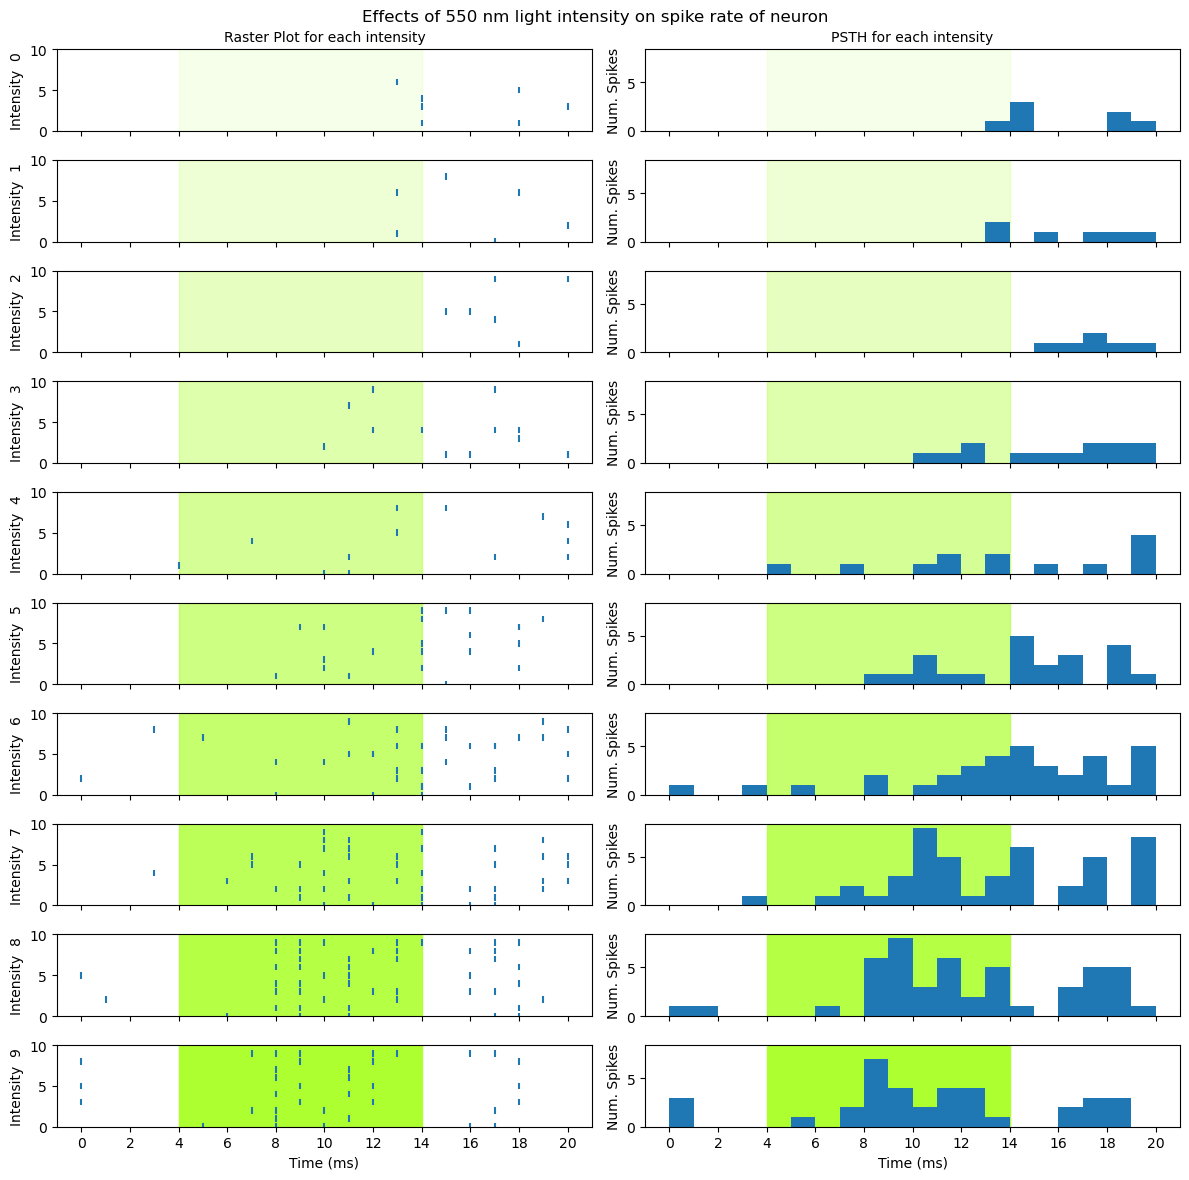

In [23]:
# Visualizing the Data ##############

# Plotting all intensity levels 

# set the number of subplot rows based on number of intensity levels in data
# specify the figure dimensions since it will need to be a big figure
fig, axs = plt.subplots(len(int_levels), 2, figsize=[12, 12], sharex=True)

y_max = 0 # Accumulator variable

for i in int_levels:
    ## Raster plot
    # select just data for current intensity level
    # this is convenient since we'll refer to this subset of data a few times below
    dat = spikes[spikes['Intensity'] == i]

    # Draw the raster one trial at a time
    for trial in trials:
        # get spike times for this trial
        spike_times = dat[dat['Trial'] == trial]['SpikeTime']
        # Draw the raster
        axs[i, 0].vlines(spike_times, 
                         trial - 0.4, trial + 0.4)

    # Shade time when stimulus was on
    axs[i, 0].axvspan(stim_on, stim_off, 
                      alpha= i / 10 + .1,       # Base intensity of shading (alpha) on intensity level
                      color='greenyellow')

    # Label the y axis with intensity level
    axs[i, 0].set_ylabel('Intensity  ' + str(i))
    
    # place title only above the first row of plots:
    if i == 0:
        axs[i, 0].set_title('Raster Plot for each intensity', fontsize=10)
 

    ## PSTH
    # Shade time when stimulus was on
    axs[i, 1].axvspan(stim_on, stim_off, 
                      alpha= i / 10 + .1, 
                      color='greenyellow')
    
    # Plot histogram
    axs[i, 1].hist(dat['SpikeTime'], bins=range(0, num_tp, 1))

    # Set the x tickmarks to every 2 ms
    axs[i, 1].set_xticks(range(0, num_tp + 1, 2))
    
    # Label the y axis 
    axs[i, 1].set_ylabel('Num. Spikes')

    # find y max of current plot
    cur_min, cur_max = axs[i, 1].get_ylim()
    
    # update y_max if necessary
    if cur_max > y_max:
        y_max = cur_max
        
    # place title only above the first row of plots:
    if i == 0:
        axs[i, 1].set_title('PSTH for each intensity', fontsize=10)
        
    # Place x label only below bottom row of plots:    
    if i == max(int_levels):
        axs[i, 1].set_xlabel('Time (ms)')
        axs[i, 0].set_xlabel('Time (ms)')

# Having plotted all intensity levels, re-scale y axis to the max we found
# Also apply the same scale to all rasters
for a in int_levels:
    axs[a, 0].set_ylim(0, num_trials)
    axs[a, 1].set_ylim(0, y_max)
    
# Add an overall figure title
fig.suptitle('Effects of 550 nm light intensity on spike rate of neuron')
    
plt.tight_layout()
plt.show()

